# Comparing populations: Punjabi in Pakistan, Indian Telugu in UK, Han Chinese, Finland, African in Southwest USA. 


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
from mylib import genomes

In [4]:
root_dir = join(Path.home(),"cp_als/populations")

# Create function to compute the total variant counts per gene per genome for each population

In [5]:
def one_population(population_name:str,genomes):
    infile = join(root_dir,f"output/{population_name}/all.csv")
    df = pd.read_csv(infile)
    df = df[genomes[population_name] + ["gene"]]
    sdf = df.groupby(["gene"]).sum()
    tdf = sdf.transpose()
    return tdf

# Pre-calculate variant counts for all populations

In [6]:
khv= one_population(population_name="KHV",genomes=genomes)
chb= one_population(population_name="CHB",genomes=genomes)
gbr= one_population(population_name="GBR",genomes=genomes)
fin= one_population(population_name="FIN",genomes=genomes)
asw= one_population(population_name="ASW",genomes=genomes)
jpt= one_population(population_name="JPT",genomes=genomes)
clm = one_population(population_name="CLM",genomes=genomes)
chs = one_population(population_name="CHS",genomes=genomes)
cdx = one_population(population_name="CDX",genomes=genomes)
gih = one_population(population_name="GIH",genomes=genomes)
itu = one_population(population_name="ITU",genomes=genomes)
stu = one_population(population_name="STU",genomes=genomes)
mxl = one_population(population_name="MXL",genomes=genomes)
pur = one_population(population_name="PUR",genomes=genomes)
pjl = one_population(population_name="PJL",genomes=genomes)
beb = one_population(population_name="BEB",genomes=genomes)
acb = one_population(population_name="ACB",genomes=genomes)
esn = one_population(population_name="ESN",genomes=genomes)
gwd = one_population(population_name="GWD",genomes=genomes)
lwk = one_population(population_name="LWK",genomes=genomes)
msl = one_population(population_name="MSL",genomes=genomes)
yri = one_population(population_name="YRI",genomes=genomes)

# Merge variant counts of populations of interest into one data frame 

In [7]:
df=pd.concat([asw,pjl,chs,fin,itu])

In [8]:
df

gene,ALS2,ANG,ATXN2,C19ORF12,C9ORF72,CHCHD10,CHMP2B,CHRNA3,CREST,DAO,...,SOD1,SPG11,SQSTM1,TAF15,TARDBP,TUBA4A,VAPB,VCP,hnRNPA2B1,hnRNPa1
NA20359,17,5,9,50,0,4,4,12,55,0,...,1,119,11,19,3,1,15,5,2,1
NA19713,43,7,162,16,18,3,17,21,46,2,...,3,122,36,15,8,4,40,3,12,0
NA20342,22,4,9,5,36,2,4,19,79,4,...,3,8,17,5,10,0,50,12,6,0
NA20289,19,5,10,4,11,3,2,30,4,10,...,8,4,15,23,9,6,38,12,6,2
NA19982,7,4,12,16,5,3,6,17,106,0,...,0,84,24,21,9,1,19,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG04202,4,1,22,10,13,1,9,28,90,1,...,0,10,6,0,2,1,13,15,1,0
HG04026,7,11,23,8,10,1,11,19,91,0,...,1,6,6,37,5,3,24,1,2,1
HG04222,21,1,19,9,17,1,13,19,88,3,...,0,6,13,3,1,4,1,13,1,0
HG03978,22,9,17,8,24,1,9,22,89,2,...,0,9,5,36,5,1,1,14,3,0


# Convert variant counts into the same range with StandardScaler

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Check the scaled data

In [10]:
X_scaled.shape

(459, 36)

In [11]:
X_scaled

array([[ 0.43012071,  0.01217086, -0.36532021, ..., -0.30589802,
        -0.25119697,  0.94391073],
       [ 2.76864487,  0.39744167,  3.49727278, ..., -0.67442082,
         3.64405329, -0.44029063],
       [ 0.87983689, -0.18046454, -0.36532021, ...,  0.98393181,
         1.30690314, -0.44029063],
       ...,
       [ 0.78989366, -0.75837074, -0.11286316, ...,  1.16819321,
        -0.64072199, -0.44029063],
       [ 0.87983689,  0.78271247, -0.16335457, ...,  1.35245461,
         0.13832806, -0.44029063],
       [-0.82908461,  1.55325408, -0.03712604, ...,  0.4311476 ,
         0.52785308,  0.94391073]], shape=(459, 36))

# Perform PCA transformation with 2 components 

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check the linear coefficients of the components

In [13]:
pca.components_.shape

(2, 36)

In [14]:
pca.components_

array([[ 0.12914755,  0.06973628,  0.32133111,  0.21358363,  0.03163065,
         0.19283495, -0.02227702,  0.01926254,  0.16662692,  0.25222227,
         0.249817  ,  0.24203858,  0.25214005,  0.08226094,  0.21351706,
         0.20004398,  0.01977396,  0.13146304,  0.18895023,  0.05188374,
         0.0148548 ,  0.20392368,  0.16695721,  0.15142532,  0.05124489,
         0.12458074,  0.19924656,  0.0517363 ,  0.31029854,  0.05244834,
         0.28454135,  0.10116538,  0.05404218,  0.08941694,  0.0785412 ,
         0.07545812],
       [-0.09515252,  0.07778513, -0.03131132, -0.04216072,  0.22306072,
         0.25574471,  0.08680294,  0.09280681, -0.04189776, -0.07533778,
        -0.11832473, -0.02243999,  0.30301571,  0.10671691, -0.06409245,
         0.04643332,  0.42778774,  0.21063306, -0.00148021, -0.03280859,
        -0.23129758,  0.08738996,  0.04869288,  0.18412444, -0.34660609,
        -0.0139188 ,  0.00927674, -0.30053663, -0.10432002, -0.11341958,
        -0.20183292, -0.09524

# Create new columns in data frame for first two components

In [15]:
df['PC1'] = X_pca[:,0]
df['PC2'] = X_pca[:,1]

In [16]:
df.shape

(459, 38)

In [17]:
df.head()

gene,ALS2,ANG,ATXN2,C19ORF12,C9ORF72,CHCHD10,CHMP2B,CHRNA3,CREST,DAO,...,SQSTM1,TAF15,TARDBP,TUBA4A,VAPB,VCP,hnRNPA2B1,hnRNPa1,PC1,PC2
NA20359,17,5,9,50,0,4,4,12,55,0,...,11,19,3,1,15,5,2,1,4.182830,-1.506734
NA19713,43,7,162,16,18,3,17,21,46,2,...,36,15,8,4,40,3,12,0,5.949525,-1.493274
NA20342,22,4,9,5,36,2,4,19,79,4,...,17,5,10,0,50,12,6,0,5.107177,2.511628
NA20289,19,5,10,4,11,3,2,30,4,10,...,15,23,9,6,38,12,6,2,6.932674,-0.573037
NA19982,7,4,12,16,5,3,6,17,106,0,...,24,21,9,1,19,2,3,1,4.835678,-1.844894


# Visualize PCA population clustering

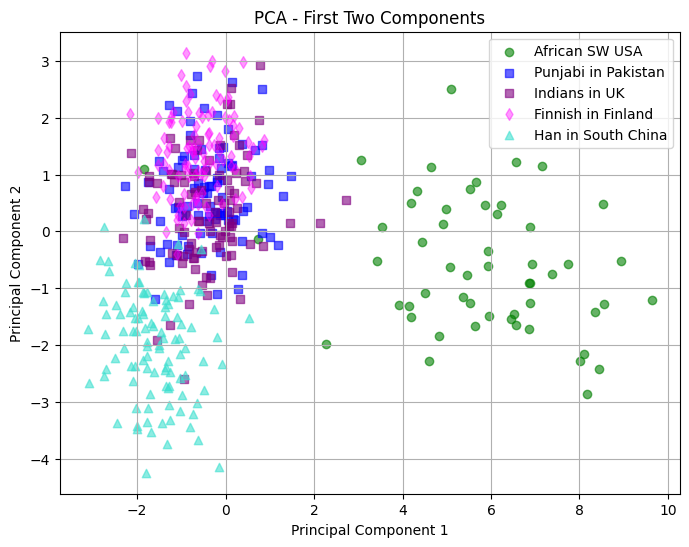

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(df.loc[genomes["ASW"]]['PC1'],df.loc[genomes["ASW"]]['PC2'],c='green',alpha = 0.6,label='African SW USA',marker='o')
plt.scatter(df.loc[genomes["PJL"]]['PC1'],df.loc[genomes["PJL"]]['PC2'],c='blue',alpha = 0.6,label='Punjabi in Pakistan',marker='s')
plt.scatter(df.loc[genomes["ITU"]]['PC1'],df.loc[genomes["ITU"]]['PC2'],c='purple',alpha = 0.6,label='Indians in UK',marker='s')
plt.scatter(df.loc[genomes["FIN"]]['PC1'],df.loc[genomes["FIN"]]['PC2'],c='magenta',alpha = 0.4,label='Finnish in Finland',marker='d')
plt.scatter(df.loc[genomes["CHS"]]['PC1'],df.loc[genomes["CHS"]]['PC2'],c='turquoise',alpha = 0.6,label='Han in South China',marker='^')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA - First Two Components')
plt.grid(True)
plt.show()